https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts-sdk/client-library?pivots=programming-language-python

In [1]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
authentication = pd.read_csv('authentication.csv')
subscription_key = authentication['key'][0]
endpoint = authentication['endpoint'][0]

In [3]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [4]:
remote_image_url = 'https://media1.popsugar-assets.com/files/thumbor/SNKOWQzSIAADx9kRyWx2nXQgbb4/fit-in/728xorig/filters:format_auto-!!-:strip_icc-!!-/2011/11/46/0/192/1922398/47990e1ba05b0a70_63754695/i/Scarlett-posed-red-carpet-2011-Oscars-while-dazed.jpg'

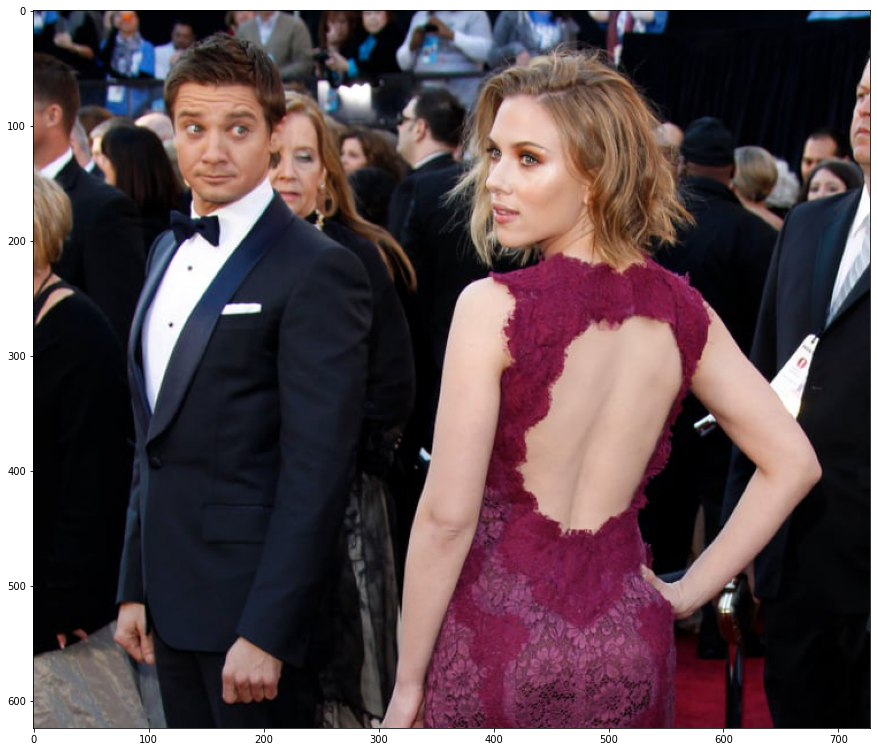

In [5]:
response = requests.get(remote_image_url)
img = Image.open(BytesIO(response.content))
fig = plt.figure(figsize=(15, 15))
plt.imshow(img)

## Image description

In [6]:
description_results = computervision_client.describe_image(remote_image_url)
for caption in description_results.captions:
    print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

'Jeremy Renner, Scarlett Johansson standing in front of a crowd' with confidence 97.53%


## Image category

In [7]:
remote_image_features = ["categories"]
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

for category in categorize_results_remote.categories:
    print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

'people_' with confidence 32.81%
'people_group' with confidence 47.66%


## Image tags

In [8]:
tags_result_remote = computervision_client.tag_image(remote_image_url )

for tag in tags_result_remote.tags:
    print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

'person' with confidence 100.00%
'clothing' with confidence 97.00%
'dress' with confidence 96.88%
'woman' with confidence 90.81%
'human face' with confidence 90.46%
'standing' with confidence 89.18%
'man' with confidence 85.32%
'people' with confidence 83.14%
'smile' with confidence 70.59%
'group' with confidence 67.28%
'crowd' with confidence 63.19%
'suit' with confidence 61.48%
'dressed' with confidence 30.83%


## Detect objects

In [9]:
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url)
for obj in detect_objects_results_remote.objects:
    print("{} at location {}, {}, {}, {}".format( \
    obj.object_property, \
    obj.rectangle.x, obj.rectangle.x + obj.rectangle.w, \
    obj.rectangle.y, obj.rectangle.y + obj.rectangle.h))

person at location 1, 89, 143, 593
person at location 63, 296, 19, 624
person at location 319, 676, 30, 617
person at location 592, 728, 26, 612


## Detect faces

In [10]:
remote_image_features = ["faces"]
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

for face in detect_faces_results_remote.faces:
    print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
    face.face_rectangle.left, face.face_rectangle.top, \
    face.face_rectangle.left + face.face_rectangle.width, \
    face.face_rectangle.top + face.face_rectangle.height))

'Female' of age 27 at location 365, 104, 456, 195
'Male' of age 33 at location 116, 80, 203, 167
'Female' of age 41 at location 190, 111, 254, 175


## Landmarks

In [11]:
# Call API with content type (landmarks) and URL
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", remote_image_url)

if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print(landmark["name"])

No landmarks detected.
